In [1]:
# data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import KMeans model
from sklearn.cluster import KMeans

# Import packages for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# Import GMM packages
from sklearn.mixture import GaussianMixture

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's start off with our data
cust = pd.read_csv('Mall_Customers.csv')

cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here we have some data on mall customers - we have their Age, Gender, Annual Income and their Spending Score (an indicaiton of how much they are spending in the mall). Let's just use two of these columns (i.e., two dimensions) to do some clustering.

In [3]:
df = cust[['Age', 'Spending Score (1-100)']]
df.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


Text(0, 0.5, 'Spending Score (1-100)')

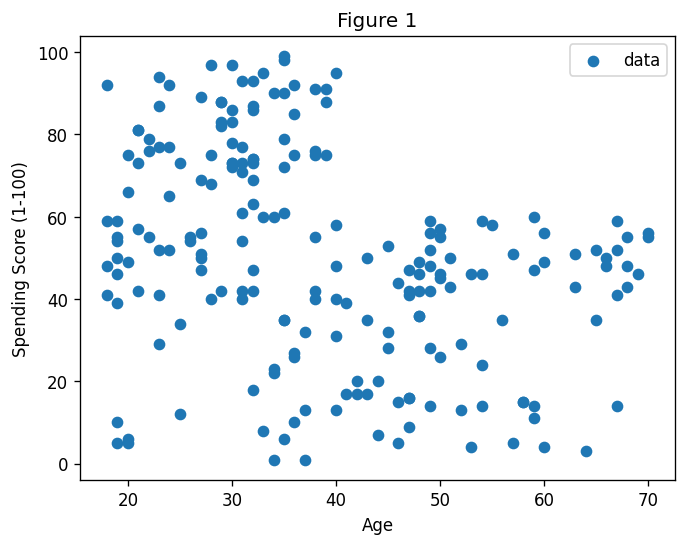

In [4]:
# plot data
plt.figure(dpi=120)
x1 = df['Age']
x2 = df['Spending Score (1-100)']
plt.scatter(x1, x2, label="data")

plt.legend()
plt.title("Figure 1")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

There don't seem to be any very clear trends in terms of linear relationships, but let's try seeing if we can come up with some clusters


**Note**: in this notebook I have not done any scaling for our clustering. Try adding in scaling yourself and see how it affects the clusters!

## K-means clustering

Let's start off with K means - let's try use this algorithm to split our data into 4 clusters (remember, we don't necessarily know the correct number of clusters, we're just starting off with something)

In [5]:
K = 4

In [11]:
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [12]:
# cluster memberships for each item in the data
y_preds = kmeans.predict(df)
df['cluster_label'] = y_preds

centers = kmeans.cluster_centers_

In [8]:
df.head()

,Age,Spending Score (1-100),cluster_label
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


Text(0, 0.5, 'Spending Score (1-100)')

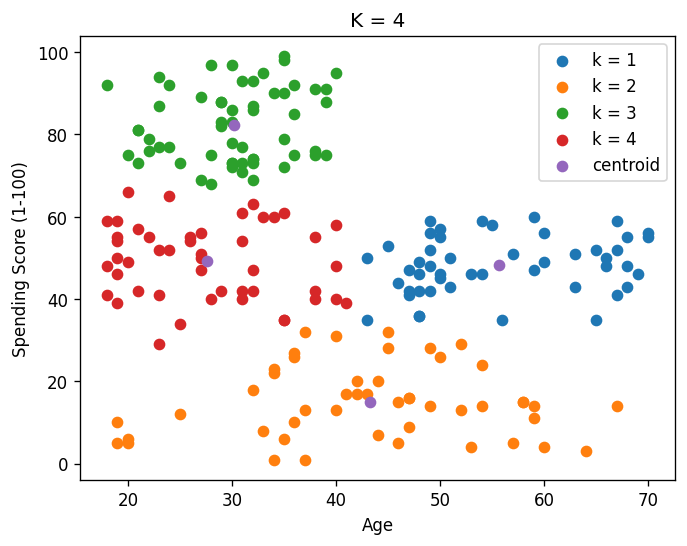

In [13]:
# plot data
plt.figure(dpi=120)
for k in range(K):
    x1 = df[df['cluster_label'] == k]['Age']
    x2 = df[df['cluster_label'] == k]['Spending Score (1-100)']
    plt.scatter(x1, x2, label="k = "+str(k+1))

# show cluster centroid locations
plt.scatter(centers[:,0],centers[:,1],label="centroid")


plt.legend()
plt.title("K = 4")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

In [ ]:
# Try plotting an elbow graph for 2-20 clusters to see if 4 is the best number of clusters?

Awesome - here we've got some clusters in different colours. The green cluster looks like younger shoppers who spend quite high, the red cluster looks like around the same age group but slightly lower spenders, the blue group looks to be older shoppers who spend around the same mid-range, and finally the orange group seems to be a wider range of ages that are all lower spenders

## Agglomerative hierarchical clustering

In [14]:
# reset our dataframe
df = cust[['Age', 'Spending Score (1-100)']]

In [15]:
hc = AgglomerativeClustering(n_clusters=K, linkage='average', affinity='euclidean')
hc.fit(df)

df['cluster_label_H'] = hc.labels_
df['cluster_label_H'] = df['cluster_label_H'].astype('int64')

In [16]:
df.head()

,Age,Spending Score (1-100),cluster_label_H
0,19,39,3
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


Text(0, 0.5, 'Spending Score (1-100)')

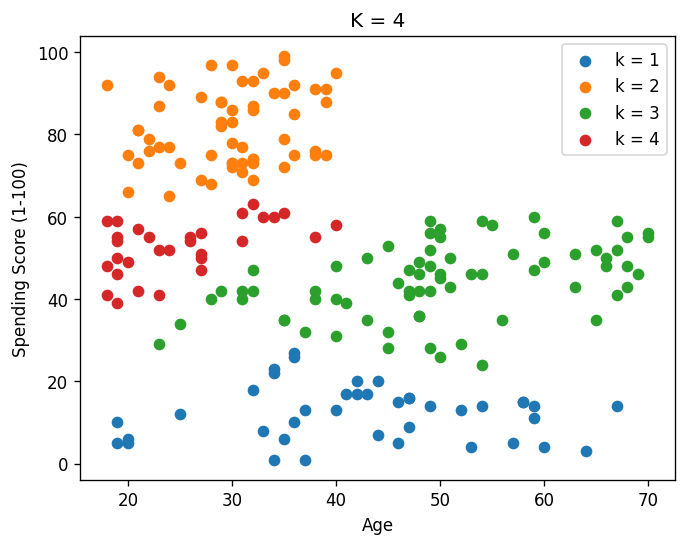

In [17]:
# plot data
plt.figure(dpi=120)
for k in range(K):
    x1 = df[df['cluster_label_H'] == k]['Age']
    x2 = df[df['cluster_label_H'] == k]['Spending Score (1-100)']
    plt.scatter(x1, x2, label="k = "+str(k+1))


plt.legend()
plt.title("K = 4")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

What do you notice different about these clusters as compared to those created through K-means? It looks like our two mid-range spending clusters are a bit different

In [39]:
# Can you plot a dendrogram to figure out what is the best number of clusters?

## Gaussian Mixture Models

In [21]:
# reset our dataframe
df = cust[['Age', 'Spending Score (1-100)']]

In [22]:
# Create the GMM instance
GMM = GaussianMixture(n_components=K, random_state=42)

# Use the object to fit the algorithm
GMM.fit(df)

# Predict in which cluster each datapoint falls
GMM_pred = GMM.predict(df)

df['cluster_label_GMM'] = GMM_pred

In [23]:
df.head()

,Age,Spending Score (1-100),cluster_label_GMM
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


Text(0, 0.5, 'Spending Score (1-100)')

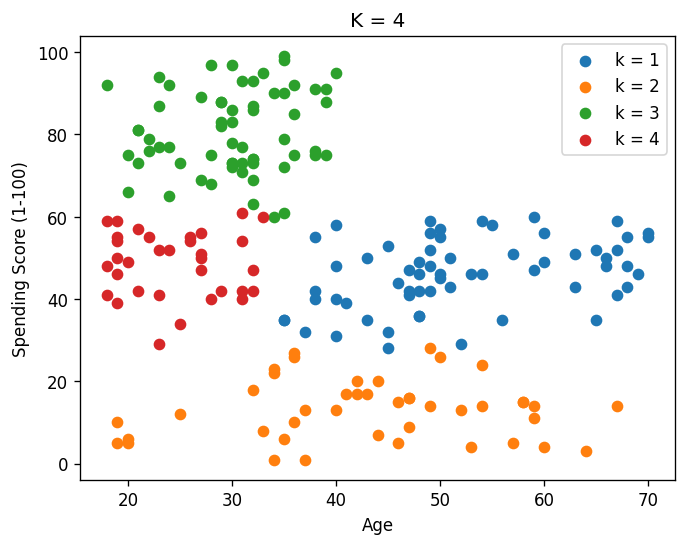

In [24]:
# plot data
plt.figure(dpi=120)
for k in range(K):
    x1 = df[df['cluster_label_GMM'] == k]['Age']
    x2 = df[df['cluster_label_GMM'] == k]['Spending Score (1-100)']
    plt.scatter(x1, x2, label="k = "+str(k+1))

plt.legend()
plt.title("K = 4")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

How does this compare to our previous two plots?

# Geopandas!

Here we're looking at how Geopandas works and what a GeoDataFrame looks like. We're using US Census data as well as a JSON file that has information that will allow us to plot all the counties in the US

In [25]:
# Import US Census data
df_us = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/acs2015_county_data.csv', encoding='utf-8').dropna()
df_us.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


Remember, you may need to `pip install geopandas` to work with it below:

In [26]:
import geopandas as gpd
gdf = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json')

In [28]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        3108 non-null   object  
 1   name      3108 non-null   object  
 2   geometry  3108 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 73.0+ KB


Here we can see we're working with a GeoDataFrame, as opposed to a usual pandas DataFrame, hence we need to use geopandas (gpd) to read the file.

The general structure of a GeoDataFrame is as follows (note the existence of the geometry column!):

![](https://geopandas.org/en/stable/_images/dataframe.svg)

GeoDataFrames have certain datatypes specific to the 'geometry' column, the basic forms of which are:

![](https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png)

When plotting our county data, we can see in the 'geometry' column all our coordinates begin with the word 'POLYGON' - this tells us that the data in that column is to plot an enclosed shape (for creating a map of US counties, this makes sense. We want all the enclosed shapes that make up the US map)

### Adding some clustering to a geopandas map...

In [29]:
# Separate out the columns we don't want to include in our clustering. Having these may skew the clustering
# because things like State and County will of course cluster together and that's not what we're interested in basing our clusters off of
labels = ['CensusId', 'State', 'County']
features = [col for col in df_us.columns if col not in labels]

# Scale our features
scaler = StandardScaler()
df_us[features] = df_us[features].astype('float64')
X = scaler.fit_transform(df_us[features])

In [30]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean').fit(X)

# Create a column for the cluster labels so we can make use of these labels
# Note that we add one, because by default the numbering of clusters starts from 0
# to make things more user-friendly, we add one so that the cluster numbering starts from 1
df_us['cluster'] = hc.labels_ + 1
df_us['cluster'] = df_us['cluster'].astype('int64')

In [31]:
# mergo our two dataframes, so we have our geometry data with all the other US Census data
gdf['id'] = gdf['id'].astype('int64')
df_merged = pd.merge(left=df_us, right=gdf, how='inner', left_on='CensusId', right_on='id')
del df_merged['id']
del df_merged['name']

# convert to a GeoDataFrame, specifying which column we wish to use for the geometry info
df_merged = gpd.GeoDataFrame(df_merged, geometry='geometry')
df_merged.head(3)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster,geometry
0,1001,Alabama,Autauga,55221.0,26745.0,28476.0,2.6,75.8,18.5,0.4,...,1.8,26.5,23986.0,73.6,20.9,5.5,0.0,7.6,2,"POLYGON ((-86.41179 32.70634, -86.41179 32.410..."
1,1003,Alabama,Baldwin,195121.0,95314.0,99807.0,4.5,83.1,9.5,0.6,...,3.9,26.4,85953.0,81.5,12.3,5.8,0.4,7.5,2,"POLYGON ((-87.76459 31.29877, -87.61671 31.244..."
2,1005,Alabama,Barbour,26932.0,14497.0,12435.0,4.6,46.2,46.7,0.2,...,1.6,24.1,8597.0,71.8,20.8,7.3,0.1,17.6,1,"POLYGON ((-85.35474 32.14769, -85.05350 32.065..."


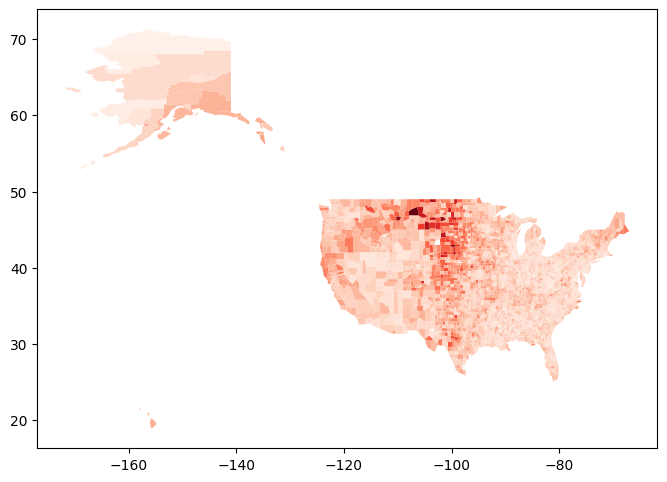

In [32]:
# Now let's plot!
df_merged.plot(column='SelfEmployed',
        cmap='Reds',
        figsize=(8,12))
plt.show()

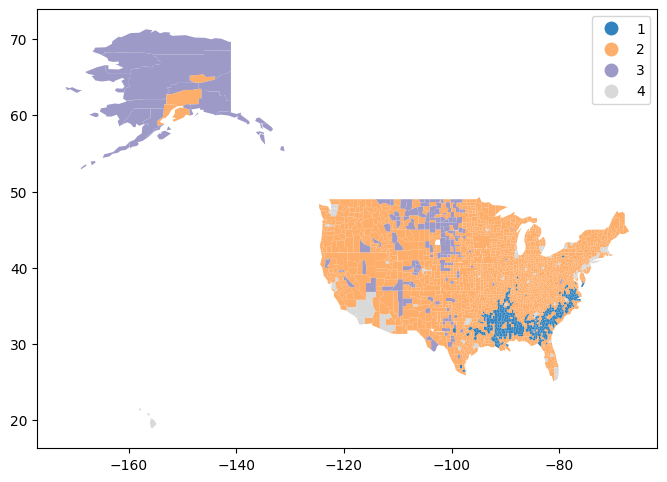

In [33]:
df_merged.plot(column='cluster',
        cmap='tab20c',
        figsize=(8,12),
        categorical=True,
        legend=True)
plt.show()

Cool! We can see how these clusters resulting from our Agglomerative Clustering are distributed across the US. From here we could look further into each of these clusters to see if there are any interesting trends that characterise these clusters. Or, we could try looking for a more optimal number of clusters...